# Synthetic Data with SDV (Iris dataset demo)

### Reference

- [Github Homepage SDV](https://github.com/sdv-dev/SDV)

In [13]:
from sdv import load_demo
from sdv import SDV
from sdv import Metadata
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load example data

In [14]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target 
df['measure_id'] = np.arange(len(df))
tables = {'iris':df}
df.shape

(150, 6)

### data tables

In [15]:
# display tables
print('TABLES:')
print(f'type: {type(tables)}')
print(f'available tables: {tables.keys()}')
for stable in tables.keys():
    print(f'shape table "{stable}": {tables[stable].shape}')

TABLES:
type: <class 'dict'>
available tables: dict_keys(['iris'])
shape table "iris": (150, 6)


### metadata

A Metadata object with all the information that SDV needs to know about the dataset.
For more details about how to build the Metadata for your own dataset, please refer to the Working with [Metadata tutorial](https://sdv.dev/SDV/user_guides/relational/relational_metadata.html).

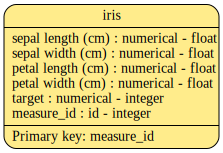

In [17]:
# initialize
metadata = Metadata()
# add table
metadata.add_table(
    name='iris',
    data=tables['iris'],
    primary_key='measure_id'
)
# display
metadata.visualize()

In [18]:
# display tables
print('METADATA:')
print(f'type: {type(metadata)}')
display(metadata)

METADATA:
type: <class 'sdv.metadata.dataset.Metadata'>


Metadata
  root_path: .
  tables: ['iris']
  relationships:

# DATA SYNTHETIC MODEL

## training

In [19]:
# initialize
sdv = SDV()
# fit
sdv.fit(metadata, tables)

### save / load the trained model

## SAMPLE: same size with synthetic data

In [20]:
# get a sample
samples1 = sdv.sample()

In [21]:
# display tables
print('SAMPLES:')
print(f'type: {type(samples1)}')
print(f'available tables: {samples1.keys()}')
for stable in samples1.keys():
    print(f'shape table "{stable}": {samples1[stable].shape}')

SAMPLES:
type: <class 'dict'>
available tables: dict_keys(['iris'])
shape table "iris": (150, 6)


## SAMPLE: bigger size with synthetic data

In [22]:
# get a sample
samples2 = sdv.sample(num_rows = 1000)

In [23]:
# display tables
print('SAMPLES:')
print(f'type: {type(samples2)}')
print(f'available tables: {samples2.keys()}')
for stable in samples2.keys():
    print(f'shape table "{stable}": {samples2[stable].shape}')

SAMPLES:
type: <class 'dict'>
available tables: dict_keys(['iris'])
shape table "iris": (1000, 6)


# VALIDATION

In [26]:
# collect data
name = 'iris'
dfu1 = tables[name]
dfu2 = samples1[name]
dfu3 = samples2[name]
cols = [c for c in dfu1.columns.tolist() if not '_id' in c]
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [27]:
c = 'target'
comp = pd.concat([dfu1[c].value_counts(normalize = True, dropna = False), dfu2[c].value_counts(normalize = True, dropna = False), dfu3[c].value_counts(normalize = True, dropna = False)], axis = 1)
comp.columns = ['original', 'synthetic', 'sythentic_bigger']
comp

,original,synthetic,sythentic_bigger
0,0.333333,0.280000,0.267
1,0.333333,0.446667,0.471
2,0.333333,0.273333,0.262


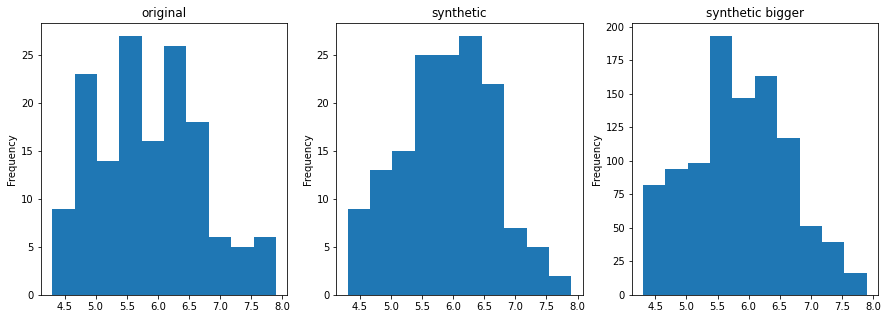

In [29]:
c = 'sepal length (cm)'
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
dfu1[c].plot(kind = 'hist', ax = ax1, title = 'original')
dfu2[c].plot(kind = 'hist', ax = ax2, title = 'synthetic')
dfu3[c].plot(kind = 'hist', ax = ax3, title = 'synthetic bigger')
plt.show()

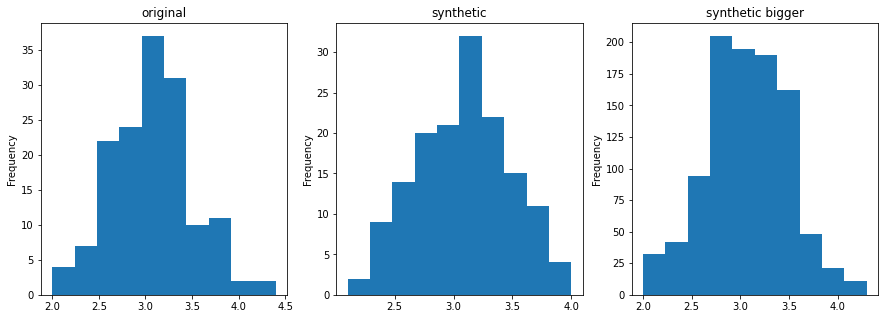

In [30]:
c = 'sepal width (cm)'
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
dfu1[c].plot(kind = 'hist', ax = ax1, title = 'original')
dfu2[c].plot(kind = 'hist', ax = ax2, title = 'synthetic')
dfu3[c].plot(kind = 'hist', ax = ax3, title = 'synthetic bigger')
plt.show()

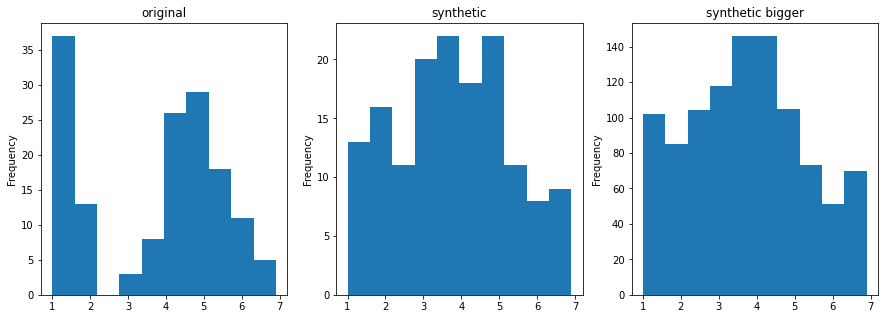

In [31]:
c = 'petal length (cm)'
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
dfu1[c].plot(kind = 'hist', ax = ax1, title = 'original')
dfu2[c].plot(kind = 'hist', ax = ax2, title = 'synthetic')
dfu3[c].plot(kind = 'hist', ax = ax3, title = 'synthetic bigger')
plt.show()

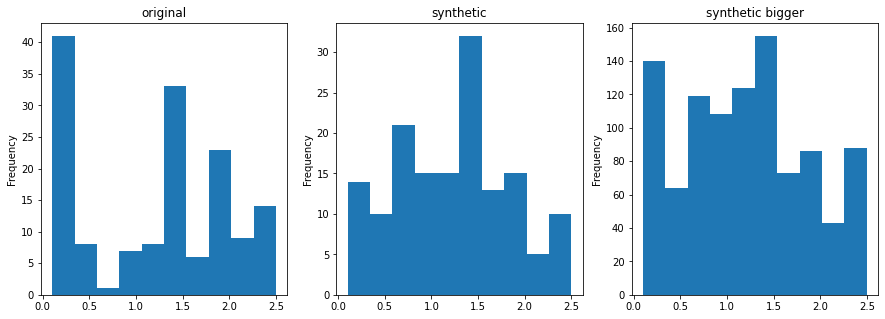

In [32]:
c = 'petal width (cm)'
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
dfu1[c].plot(kind = 'hist', ax = ax1, title = 'original')
dfu2[c].plot(kind = 'hist', ax = ax2, title = 'synthetic')
dfu3[c].plot(kind = 'hist', ax = ax3, title = 'synthetic bigger')
plt.show()

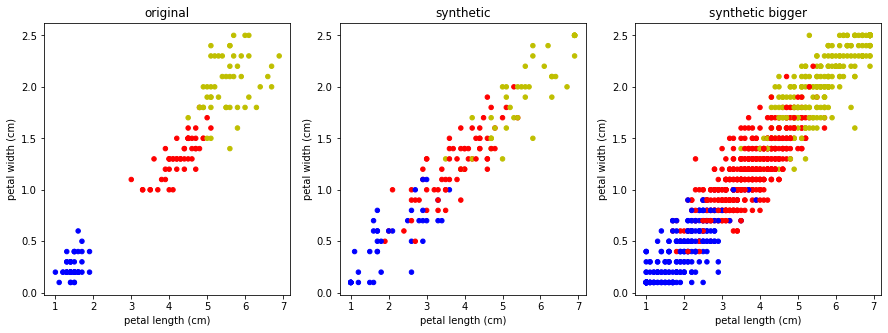

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
col = dfu1.target.map({0:'b', 1:'r', 2:'y'})
dfu1.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', c = col, ax = ax1, title = 'original')
col = dfu2.target.map({0:'b', 1:'r', 2:'y'})
dfu2.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', c = col, ax = ax2, title = 'synthetic')
col = dfu3.target.map({0:'b', 1:'r', 2:'y'})
dfu3.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', c = col, ax = ax3, title = 'synthetic bigger')
plt.show()